# Taller de la Ley de Zipf

### Integrantes del grupo
- Aponte Duque, Juan - aponte.juan@javeriana.edu.co
- Cardozo Amin, Cristian - cristiancardozo@javeriana.edu.co
- Triana Ocampo, Benkos - b.triana@javeriana.edu.co

üìÖ **Fecha de entrega:** 11/08/2025

---
---
## 1. Introducci√≥n
La **Ley de Zipf** afirma que si ordenamos las palabras de un texto de mayor a menor frecuencia, la segunda aparecer√° aproximadamente la mitad que la primera, la tercera un tercio, y as√≠ sucesivamente. Este patr√≥n suele observarse en libros, discursos y canciones.

En canciones, la repetici√≥n (coros, muletillas, onomatopeyas) hace especialmente visible este comportamiento.

**Objetivos del taller**
1) Probar diferentes m√©todos de segmentaci√≥n de palabras.
2) Contar las palabras y calcular su frecuencia.
3) Visualizar la relaci√≥n *rango‚Äìfrecuencia*.
4) Explorar variaciones al incorporar aspectos fonol√≥gicos y fon√©ticos.

In [1]:
#pip install nltk
#pip install transformers
#pip install fonemas
#pip install textstat

In [2]:
#Librerias

#basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import accumulate

#nltk
import nltk
from nltk.text import Text
from nltk import FreqDist
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

#Bert
from transformers import AutoTokenizer

#fonemas
from fonemas import Transcription

#Textometr√≠a
import textstat

In [3]:
#get nltk resources
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ccca1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ccca1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
---
## 2. Datos y fuentes

Se seleccion√≥ una **canci√≥n por a√±o en Colombia**, priorizando la m√°s popular o m√°s representativa del periodo. Si la letra no estaba disponible o la informaci√≥n era insuficiente para tomar una decisi√≥n, ese a√±o fue omitido.

Toda la informaci√≥n se consolid√≥ en un archivo Excel, con columnas para **a√±o**, **t√≠tulo**, **artista**, **g√©nero** y **letra**. Adem√°s, esta selecci√≥n se complementa con contenido de otras dos fuentes reconocidas (las listas de *El Tiempo* y *Radio Nacional de Colombia*) y con la inspiraci√≥n del video musical que compartimos.

Las fuentes adicionales son:
- La lista **Las 50 mejores canciones de Colombia** del diario *El Tiempo*: 

[https://www.eltiempo.com/don-juan/cultura/las-50-mejores-canciones-de-colombia+articulo+12683827](https://www.eltiempo.com/don-juan/cultura/las-50-mejores-canciones-de-colombia+articulo+12683827)  
- La recopilaci√≥n **Radio Nacional de Colombia: 80 a√±os en 80 canciones**: 

[https://www.radionacional.co/cultura/radio-nacional-de-colombia-80-anos-en-80-canciones](https://www.radionacional.co/cultura/radio-nacional-de-colombia-80-anos-en-80-canciones)  
- El video de **FULANITOVIAJERO ‚Äì Periodista Musical**: 

[https://www.youtube.com/watch?v=mUyhGhySNek&list=RDmUyhGhySNek&start_radio=1](https://www.youtube.com/watch?v=mUyhGhySNek&list=RDmUyhGhySNek&start_radio=1)


### Canciones seleccionadas (a√±o ‚Äì g√©nero ‚Äì t√≠tulo ‚Äì artista)

- 1945 ‚Äì Porro ‚Äì *Se va el caim√°n* ‚Äì Jos√© Mar√≠a Pe√±aranda  
- 1946 ‚Äì Bambuco ‚Äì *Soy Colombiano* ‚Äì Rafael Godoy (Garz√≥n y Collazos)  
- 1947 ‚Äì Rumba criolla ‚Äì *La loca Margarita* ‚Äì Hermanas Garavito  
- 1948 ‚Äì Cumbia ‚Äì *Navidad Negra* ‚Äì Los Trovadores de Bar√∫  
- 1949 ‚Äì Foxtrot tropical ‚Äì *Pachito E‚Äôch√©* ‚Äì Alex Tovar (Lucho Berm√∫dez y su Orq.)  
- 1950 ‚Äì Joropo ‚Äì *Ay si, si* ‚Äì Luis Ariel Rey  
- 1951 ‚Äì Bambuco ‚Äì *Los cisnes* ‚Äì Garz√≥n y Collazos  
- 1952 ‚Äì Vallenato ‚Äì *Alicia la campesina* ‚Äì Los Vallenatos del Magdalena  
- 1953 ‚Äì Porro ‚Äì *El a√±o viejo* ‚Äì Crescencio Salcedo  
- 1954 ‚Äì Porro ‚Äì *La m√∫cura* ‚Äì Lucho Berm√∫dez y Matilde D√≠az  
- 1955 ‚Äì Merecumb√© ‚Äì *Cosita linda* ‚Äì Pacho Gal√°n  
- 1956 ‚Äì Vallenato ‚Äì *Lirio rojo* ‚Äì Calixto Ochoa  
- 1957 ‚Äì Rumba criolla ‚Äì *Por vivir en Bogot√°* ‚Äì Hermanas Garavito  
- 1959 ‚Äì Cumbia ‚Äì *El pescador* ‚Äì Jos√© Barros (Los Trovadores de Bar√∫)  
- 1960 ‚Äì Cumbia ‚Äì *La piragua* ‚Äì Jos√© Barros (Los Black Stars)  
- 1961 ‚Äì Cumbia ‚Äì *La pollera color√°* ‚Äì Wilson Choperena (Orq. de P. Salcedo)  
- 1962 ‚Äì Porro ‚Äì *La paloma guarumera* ‚Äì Los Corraleros de Majagual  
- 1963 ‚Äì Vallenato ‚Äì *La casa en el aire* ‚Äì Rafael Escalona (Bovea y sus Vallenatos)  
- 1964 ‚Äì Currulao ‚Äì *A la mina no voy* ‚Äì Leonor Gonz√°lez Mina  
- 1965 ‚Äì Bambuco ‚Äì *Pueblito viejo* ‚Äì Garz√≥n y Collazos  
- 1966 ‚Äì Nueva ola ‚Äì *Llorando estoy* ‚Äì Vicky (Esperanza Acevedo)  
- 1967 ‚Äì Cumbia ‚Äì *La piragua* ‚Äì Gabriel Romero & Los Black Stars  
- 1968 ‚Äì Vallenato ‚Äì *Pedazo de acorde√≥n* ‚Äì Alejo Dur√°n  
- 1969 ‚Äì Currulao ‚Äì *Mi Buenaventura* ‚Äì Peregoyo y su Combo Vacan√°  
- 1970 ‚Äì Balada rom√°ntica ‚Äì *Ll√©vame contigo* ‚Äì Claudia de Colombia  
- 1971 ‚Äì Cumbia ‚Äì *Los sabanales* ‚Äì Los Corraleros de Majagual (Calixto Ochoa)  
- 1972 ‚Äì Balada pop ‚Äì *Alguien cant√≥ una canci√≥n* ‚Äì Billy Pontoni  
- 1973 ‚Äì Salsa ‚Äì *La sirena* ‚Äì Nelson y Sus Estrellas  
- 1974 ‚Äì Salsa ‚Äì *Las cale√±as son como las flores* ‚Äì The Latin Brothers (Joe Arroyo)  
- 1975 ‚Äì Salsa ‚Äì *El preso* ‚Äì Fruko y Sus Tesos  
- 1976 ‚Äì Vallenato ‚Äì *La creciente* ‚Äì Binomio de Oro de Am√©rica  
- 1977 ‚Äì Balada ‚Äì *Llamarada* ‚Äì Isadora (Fernanda Bustos)  
- 1978 ‚Äì Bolero ‚Äì *Mar√≠a de los guardias* ‚Äì Helenita Vargas  
- 1979 ‚Äì Cumbia tropical ‚Äì *Cari√±ito* ‚Äì Rodolfo Aicardi  
- 1980 ‚Äì Carranga ‚Äì *La cucharita* ‚Äì Jorge Velosa y Los Carrangueros  
- 1981 ‚Äì Joropo ‚Äì *Ay mi llanura* ‚Äì Arnulfo Brice√±o  
- 1982 ‚Äì Vallenato ‚Äì *Todo es para ti* ‚Äì Diomedes D√≠az  
- 1983 ‚Äì Cumbia ‚Äì *Golpe con golpe* ‚Äì Pastor L√≥pez  
- 1984 ‚Äì Salsa ‚Äì *Cali pachanguero* ‚Äì Grupo Niche  
- 1985 ‚Äì Balada pop ‚Äì *¬øD√≥nde estar√° mi primavera?* ‚Äì Ra√∫l Santi  
- 1986 ‚Äì Salsa ‚Äì *Rebeli√≥n* ‚Äì Joe Arroyo y La Verdad  
- 1987 ‚Äì Balada pop ‚Äì *Como un picaflor* ‚Äì Ra√∫l Santi  
- 1988 ‚Äì Rock en espa√±ol ‚Äì *La calle* ‚Äì Compa√±√≠a Ilimitada  
- 1989 ‚Äì Balada ‚Äì *La causa nacional* ‚Äì Sociedad An√≥nima  
- 1990 ‚Äì Salsa ‚Äì *Una aventura* ‚Äì Grupo Niche  
- 1991 ‚Äì Cumbia ‚Äì *Colombia tierra querida* ‚Äì Lucho Berm√∫dez & Matilde D√≠az  
- 1993 ‚Äì Vallenato fusi√≥n ‚Äì *La gota fr√≠a* ‚Äì Carlos Vives  
- 1994 ‚Äì Vallenato ‚Äì *El santo cach√≥n* ‚Äì Los Embajadores Vallenatos  
- 1995 ‚Äì Pop latino ‚Äì *Estoy aqu√≠* ‚Äì Shakira  
- 1996 ‚Äì Jazz-folk ‚Äì *Los caminos de la vida* ‚Äì Los Diablitos (Omar Geles)  
- 1997 ‚Äì Tropipop ‚Äì *La tierra del olvido* ‚Äì Carlos Vives  
- 1998 ‚Äì Rock ‚Äì *Florecita rockera* ‚Äì Aterciopelados  
- 1999 ‚Äì Pop-rock ‚Äì *Me voy* ‚Äì Andr√©s Cepeda  
- 2000 ‚Äì Rock ‚Äì *F√≠jate bien* ‚Äì Juanes  
- 2001 ‚Äì Pop rock ‚Äì *Suerte (Whenever, Wherever)* ‚Äì Shakira  
- 2002 ‚Äì Rock ‚Äì *A Dios le pido* ‚Äì Juanes  
- 2004 ‚Äì Salsa ‚Äì *La pantera mambo* ‚Äì La 33  
- 2005 ‚Äì Pop rock ‚Äì *La camisa negra* ‚Äì Juanes  
- 2007 ‚Äì Hip-hop ‚Äì *Somos pac√≠fico* ‚Äì ChocQuibTown  
- 2008 ‚Äì Electro-cumbia ‚Äì *Fuego* ‚Äì Bomba Est√©reo  
- 2009 ‚Äì Electro-folk ‚Äì *Mi Kolombia* ‚Äì Systema Solar  
- 2010 ‚Äì Pop ‚Äì *Waka Waka* ‚Äì Shakira (ft. Freshlyground)  
- 2011 ‚Äì Hip-hop ‚Äì *Chocolate* ‚Äì Profetas  
- 2012 ‚Äì Swing ‚Äì *Su√≠n Romantic√≥n* ‚Äì Monsieur Perin√©  
- 2013 ‚Äì Pop-vallenato ‚Äì *Volv√≠ a nacer* ‚Äì Carlos Vives  
- 2014 ‚Äì Reguet√≥n ‚Äì *6 AM* ‚Äì J Balvin (ft. Farruko)  
- 2015 ‚Äì Reguet√≥n ‚Äì *Ginza* ‚Äì J Balvin  
- 2016 ‚Äì Vallenato-pop ‚Äì *La bicicleta* ‚Äì Carlos Vives & Shakira  
- 2017 ‚Äì Reguet√≥n ‚Äì *Mi gente* ‚Äì J Balvin & Willy William  
- 2018 ‚Äì Reguet√≥n ‚Äì *Mi cama* ‚Äì Karol G  
- 2019 ‚Äì Reguet√≥n-pop ‚Äì *Tusa* ‚Äì Karol G (ft. Nicki Minaj)  
- 2020 ‚Äì Reguet√≥n-pop ‚Äì *Haw√°i* ‚Äì Maluma  
- 2021 ‚Äì Reguet√≥n ‚Äì *Bichota* ‚Äì Karol G  
- 2022 ‚Äì Reguet√≥n ‚Äì *Provenza* ‚Äì Karol G  
- 2023 ‚Äì Reguet√≥n-pop ‚Äì *TQG (Te Qued√≥ Grande)* ‚Äì Karol G & Shakira  
- 2024 ‚Äì Reguet√≥n-pop ‚Äì *LUNA* ‚Äì ATL Jacob & Feid  
- 2025 ‚Äì Pop ‚Äì *Enamorarte Mil Veces* ‚Äì Fonseca & Manuel Medrano  

In [4]:
data_lyrics = pd.read_excel('../data/input/Canciones_Colombianas_1945_2023.xlsx')
data_lyrics.head(3)

year               song                             autor         genero  \
0  1945    Se va el caim√°n              Jos√© Mar√≠a Pe√±aranda          Porro   
1  1946     Soy Colombiano  Rafael Godoy (Garz√≥n y Collazos)        Bambuco   
2  1947  La loca Margarita                 Hermanas Garavito  Rumba criolla   

                                               letra  
0  Voy a empezar mi relato con alegr√≠a y con af√°n...  
1  A m√≠ deme un aguardiente, un aguardiente de ca...  
2  Hay en Bogot√° una loquita \nque lleva siempre ...

### 2.1. Distribuci√≥n de g√©neros
Calculamos y graficamos la distribuci√≥n de g√©neros musicales

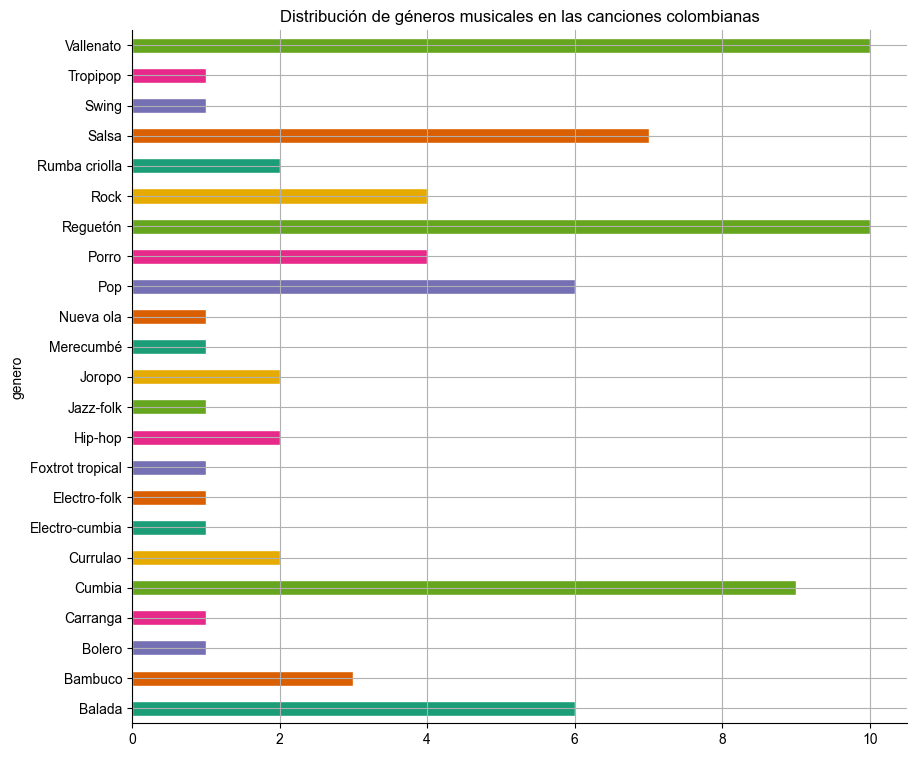

In [5]:
plt.figure(figsize=(10, 9))
plt.title('Distribuci√≥n de g√©neros musicales en las canciones colombianas')
plt.xlabel('N√∫mero de canciones')
plt.ylabel('G√©nero musical')
sns.set_style("whitegrid")
sns.set_palette("Dark2")
data_lyrics.sort_values(by=['genero']).groupby(['genero']).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

---
---
# 3. An√°lisis l√©xico y validaci√≥n de la Ley de Zipf

Esta secci√≥n realiza la tokenizaci√≥n del texto de cada canci√≥n, el c√°lculo de la frecuencia de aparici√≥n de cada palabra y la visualizaci√≥n de la distribuci√≥n de frecuencias.

El objetivo es verificar si las canciones siguen el comportamiento propuesto por la Ley de Zipf.

Se observar√° si la frecuencia de una palabra est√° inversamente relacionada con su posici√≥n en el ranking de palabras m√°s usadas.

### 3.1. Tokenizaci√≥n: NLTK vs alternativas

- Spanish & NLTK
- Tweet
- BERT (base)
- RoBERTa entrenado en corpus en espa√±ol

Adelant√°ndonos a la conclusi√≥n, se opt√≥ por el tokenizador en espa√±ol de NLTK, ya que no realiza transformaciones sobre los tokens y, adem√°s, facilita su interpretaci√≥n, lo que resulta ventajoso para el an√°lisis posterior.

In [6]:
#get example text
example_text = data_lyrics['letra'][45]
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenizaci√≥n spanish
tokens = word_tokenize(language="spanish", text=example_text)
text = Text(tokens)
print("Tokenizaci√≥n nltk & spanish")
for i in range(0, min(len(text), 100), 10):
    print(text[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armon√≠a.
Cantemos, cantemos todos
grito de paz y alegr√≠a.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oraci√≥n
y es un canto de la vida.
...
Tokenizaci√≥n nltk & spanish
['Colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armon√≠a']
['.', 'Cantemos', ',', 'cantemos', 'todos', 'grito', 'de', 'paz', 'y', 'alegr√≠a']
['.', 'Vivemos', ',', 'siempre', 'vivemos', 'a', 'nuestra', 'patria', 'querida', '.']
['Su', 'suelo', 'es', 'una', 'oraci√≥n', 'y', 'es', 'un', 'canto', 'de']
['la', 'vida', '.', 'Su', 'suelo', 'es', 'una', 'oraci√≥n', 'y', 'es']
['un', 'canto', 'de', 'la', 'vida', '.', 'Cantando', ',', 'cantando', 'yo']
['vivir√©', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Cantando', ',', 'cantando']
['yo', 'vivir√©', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Colombia', ',']
['te', 'hiciste', 'grande', 'con', 'el', 'furor', 'de', 'tu', 'gloria', ',']
['la', 'Am√©rica', 'toda',

In [7]:
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenizaci√≥n tweet
tokenTweet = TweetTokenizer()
tokens_tweet = tokenTweet.tokenize(text=example_text)
text_tweet = Text(tokens_tweet)

print("Tokenizaci√≥n tweet")
for i in range(0, min(len(text_tweet), 100), 10):
    print(text_tweet[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armon√≠a.
Cantemos, cantemos todos
grito de paz y alegr√≠a.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oraci√≥n
y es un canto de la vida.
...
Tokenizaci√≥n tweet
['Colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armon√≠a']
['.', 'Cantemos', ',', 'cantemos', 'todos', 'grito', 'de', 'paz', 'y', 'alegr√≠a']
['.', 'Vivemos', ',', 'siempre', 'vivemos', 'a', 'nuestra', 'patria', 'querida', '.']
['Su', 'suelo', 'es', 'una', 'oraci√≥n', 'y', 'es', 'un', 'canto', 'de']
['la', 'vida', '.', 'Su', 'suelo', 'es', 'una', 'oraci√≥n', 'y', 'es']
['un', 'canto', 'de', 'la', 'vida', '.', 'Cantando', ',', 'cantando', 'yo']
['vivir√©', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Cantando', ',', 'cantando']
['yo', 'vivir√©', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Colombia', ',']
['te', 'hiciste', 'grande', 'con', 'el', 'furor', 'de', 'tu', 'gloria', ',']
['la', 'Am√©rica', 'toda', 'canta',

In [8]:
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenizaci√≥n tweet
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokens_bert = tokenizer.tokenize(example_text)
text_bert = Text(tokens_bert)

print("Tokenizaci√≥n BERT")
for i in range(0, min(len(text_bert), 100), 10):
    print(text_bert[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armon√≠a.
Cantemos, cantemos todos
grito de paz y alegr√≠a.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oraci√≥n
y es un canto de la vida.
...
Tokenizaci√≥n BERT
['Colombia', ',', 'tier', '##ra', 'que', '##rida', ',', 'him', '##no', 'de']
['f', '##e', 'y', 'arm', '##on', '##√≠a', '.', 'Can', '##tem', '##os']
[',', 'can', '##tem', '##os', 'to', '##dos', 'g', '##rito', 'de', 'p']
['##az', 'y', 'ale', '##g', '##r', '##√≠a', '.', 'V', '##ive', '##mos']
[',', 'si', '##em', '##p', '##re', 'v', '##ive', '##mos', 'a', 'n']
['##uest', '##ra', 'pat', '##ria', 'que', '##rida', '.', 'Su', 'sue', '##lo']
['es', 'un', '##a', 'or', '##ac', '##i√≥n', 'y', 'es', 'un', 'can']
['##to', 'de', 'la', 'v', '##ida', '.', 'Su', 'sue', '##lo', 'es']
['un', '##a', 'or', '##ac', '##i√≥n', 'y', 'es', 'un', 'can', '##to']
['de', 'la', 'v', '##ida', '.', 'Can', '##tan', '##do', ',', 'can']


In [9]:
print(f"Texto de ejemplo: {example_text[:200]}...")

tokenizer_bert_spanish = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
tokens_bert_spanish = tokenizer_bert_spanish.tokenize(example_text)
text_bert_spanish = Text(tokens_bert_spanish)

print("Tokenizaci√≥n BERT SPANISH")
for i in range(0, min(len(text_bert_spanish), 100), 10):
    print(text_bert_spanish[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armon√≠a.
Cantemos, cantemos todos
grito de paz y alegr√≠a.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oraci√≥n
y es un canto de la vida.
...
Tokenizaci√≥n BERT SPANISH
['colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armon√≠a']
['.', 'cante', '##mos', ',', 'cante', '##mos', 'todos', 'grito', 'de', 'paz']
['y', 'alegr√≠a', '.', 'vive', '##mos', ',', 'siempre', 'vive', '##mos', 'a']
['nuestra', 'patria', 'querida', '.', 'su', 'suelo', 'es', 'una', 'oraci√≥n', 'y']
['es', 'un', 'canto', 'de', 'la', 'vida', '.', 'su', 'suelo', 'es']
['una', 'oraci√≥n', 'y', 'es', 'un', 'canto', 'de', 'la', 'vida', '.']
['cantando', ',', 'cantando', 'yo', 'vivir', '##√©', ',', 'colombia', ',', 'tierra']
['querida', '.', 'cantando', ',', 'cantando', 'yo', 'vivir', '##√©', ',', 'colombia']
[',', 'tierra', 'querida', '.', 'colombia', ',', 'te', 'hiciste', 'grande', 'con']
['el', 'fur', '##or', 'de', 'tu', 

### 3.2. Frecuencia de palabras
Calculamos la frecuencia de las palabras y graficamos las **100 m√°s comunes**.

In [10]:
def concatenate_column(df, column_name, separator=' | '):
    concatenated_string = df[column_name].astype(str).str.cat(sep=separator)
    return concatenated_string

In [11]:
tokens_letra = Text(word_tokenize(language="spanish", text=concatenate_column(data_lyrics, 'letra')))

In [12]:
fdist1 = FreqDist(tokens_letra)
fdist1.tabulate(50)

   ,  que   la   de   no    a   el   me   mi    Y    y   te    (    )   en    '  con   se   yo   es  Que  por   lo   tu   un  una  los    .   No como  las   Yo   La   Ay   pa amor    |   s√≠ para   le   m√≠   si   al todo vida   ti   El    ?  del   Me 
1099  594  521  472  362  344  316  304  287  285  255  241  224  224  221  219  207  194  180  174  158  153  153  149  144  121  113  113  105   95   94   91   87   83   82   79   76   76   74   71   68   67   65   65   65   65   63   62   62   62 


<Axes: title={'center': 'Frecuencia de las 100 palabras m√°s comunes en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Percents'>

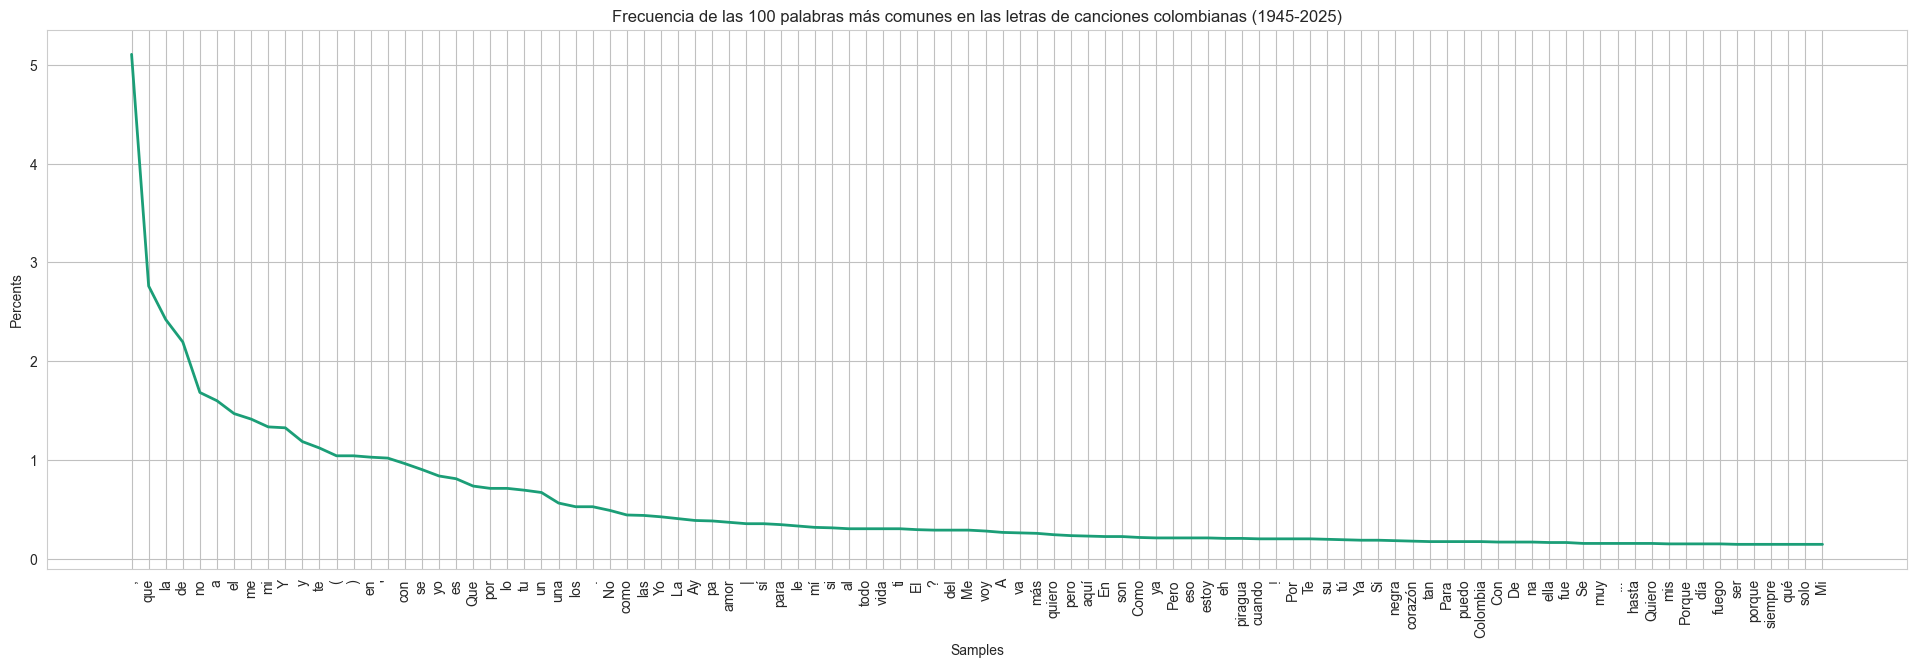

In [13]:
fig = plt.figure(figsize = (24, 7))
fdist1.plot(100,percents=True, title = 'Frecuencia de las 100 palabras m√°s comunes en las letras de canciones colombianas (1945-2025)')

<Axes: title={'center': 'Frecuencia acumulada de las 100 palabras m√°s comunes en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Cumulative Percents'>

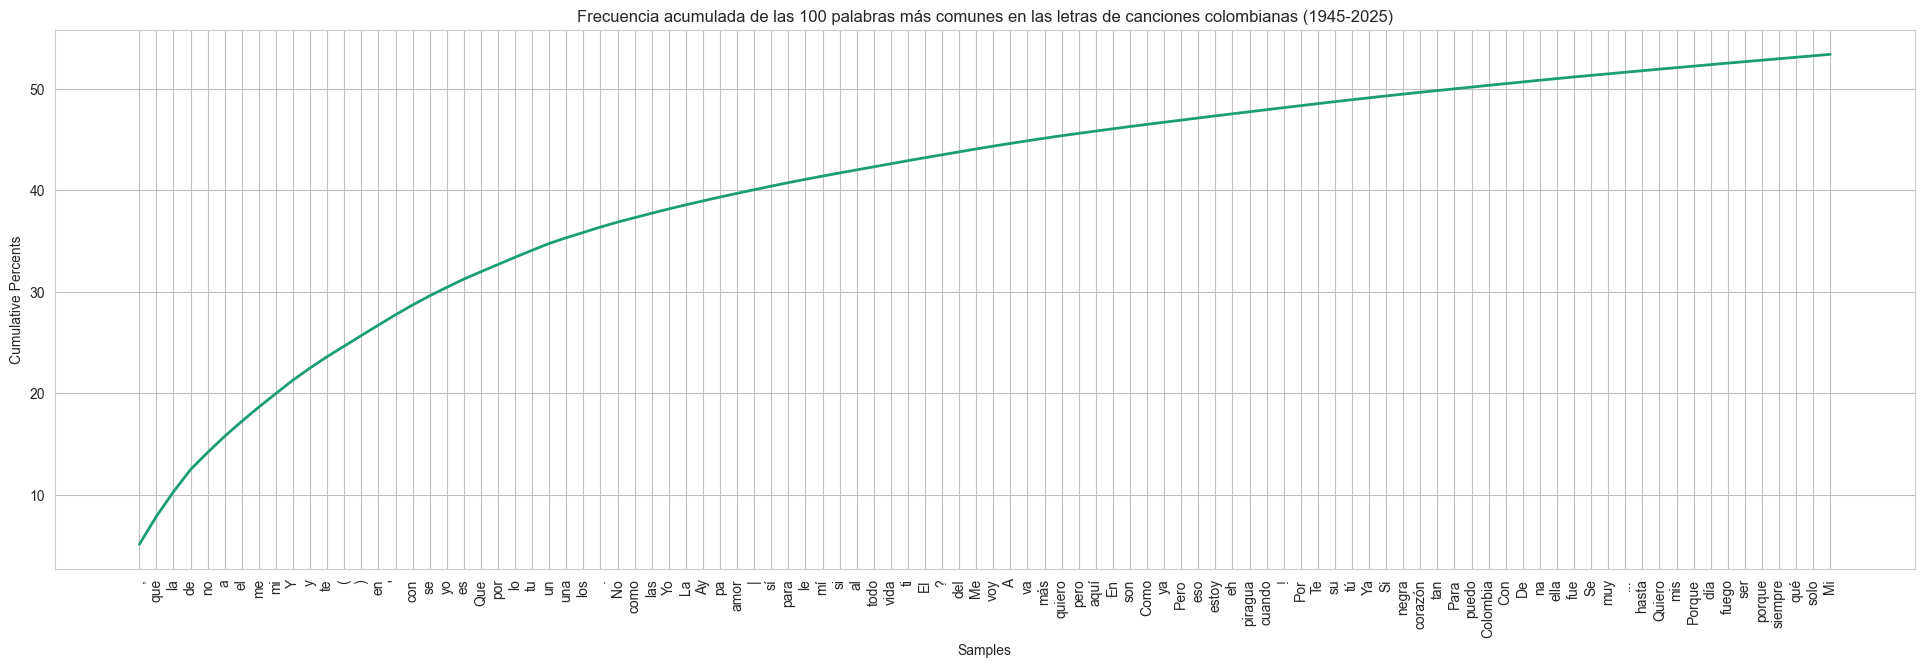

In [14]:
fig = plt.figure(figsize = (24, 7))
fdist1.plot(100, cumulative=True, percents=True, title = 'Frecuencia acumulada de las 100 palabras m√°s comunes en las letras de canciones colombianas (1945-2025)')

### 3.3. Validaci√≥n de la ley de Zipf (escala log‚Äìlog)
Si la relaci√≥n *rango‚Äìfrecuencia* sigue una pendiente aproximadamente lineal en log‚Äìlog, es compatible con la Ley de Zipf.

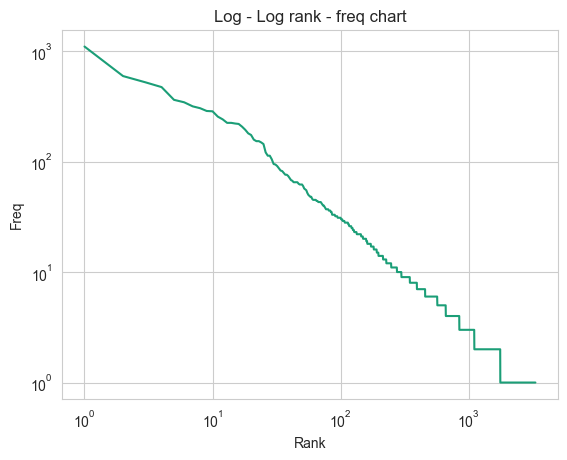

In [15]:
# Funcion
fd = {k: v for k, v in sorted(fdist1.items(), key=lambda item: item[1], reverse=True)}

ranks = []
freqs = []

for rank, word in enumerate(fd):
    ranks.append(rank + 1)
    freqs.append(fd[word])

# Gr√°fico Ley de Zipf
plt.loglog(ranks, freqs)
plt.xlabel('Rank')
plt.ylabel('Freq')
plt.title('Log - Log rank - freq chart')
plt.show()

El comportamiento de la curva en escala log-log confirma la ley de zifp que unas pocas palabras concentran gran parte de las apariciones, mientras que la mayor√≠a son muy poco frecuentes.

### 3.4. Repetici√≥n del an√°lisis sin *stop words*
Eliminamos palabras funcionales comunes (el, la, de, y, ...). Si no est√°n disponibles las *stopwords* de NLTK, se usa un listado m√≠nimo.

In [16]:
#get stop words
list_words_sw = stopwords.words('spanish')

In [17]:
words = [word.lower() for word in word_tokenize(language="spanish", text=concatenate_column(data_lyrics, 'letra')) if word.lower() not in list_words_sw and word.isalnum()]

9570


<Axes: title={'center': 'Frecuencia de las 100 palabras m√°s comunes SIN STOPWORDS en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Percents'>

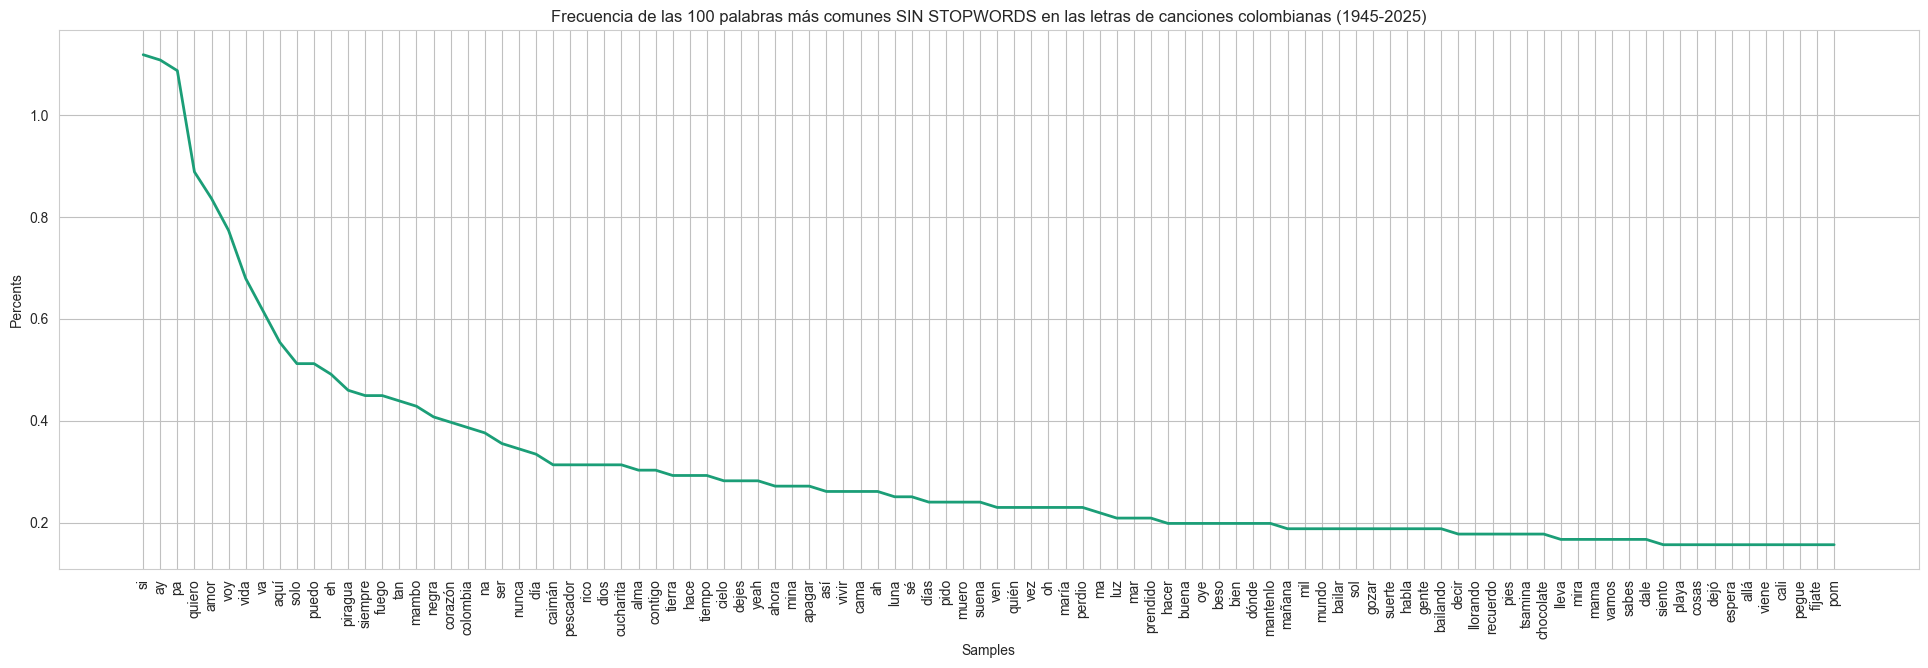

In [18]:
# Gr√°fico
fig = plt.figure(figsize = (24, 7))
print(len(words))
fd = FreqDist(words)
fd.plot(100, percents=True, title = 'Frecuencia de las 100 palabras m√°s comunes SIN STOPWORDS en las letras de canciones colombianas (1945-2025)')

---
---
# 4. An√°lisis fonol√≥gico y fon√©tico

En esta parte, se va ha transcribir fon√©ticamente las palabras de las canciones seleccionadas. El an√°lisis fonol√≥gico permite observar los patrones sonoros del lenguaje en las canciones

In [19]:
words_fonetico = words

In [20]:
test_word = "esternocleidomastoideo"
print(f"Palabra de prueba '{test_word}':")

transcription = Transcription(test_word)
print(f"Transcripci√≥n fonol√≥gico: {transcription.phonology.words}")
print(f"Transcripci√≥n fon√©tico: {transcription.phonetics.words}")

print(f"Transcripci√≥n fonol√≥gico: {transcription.phonology.syllables}")
print(f"Transcripci√≥n fon√©tico: {transcription.phonetics.syllables}")

Palabra de prueba 'esternocleidomastoideo':
Transcripci√≥n fonol√≥gico: ['este…ænoklejdomastojÀàdeo']
Transcripci√≥n fon√©tico: ['este…ænoklej√∞omastojÀà√∞eo']
Transcripci√≥n fonol√≥gico: ['es', 'te…æ', 'no', 'klej', 'do', 'mas', 'toj', 'Ààde', 'o']
Transcripci√≥n fon√©tico: ['es', 'te…æ', 'no', 'klej', '√∞o', 'mas', 'toj', 'Àà√∞e', 'o']


In [21]:
for token in words_fonetico[:10]:

    if not token.strip():
        print(f"Token vac√≠o: '{token}'")
        continue

    transcription = Transcription(token)
    print(f"Palabra: {token}")
    print(f"Transcripci√≥n fonol√≥gico: {transcription.phonology.words}")
    print(f"Transcripci√≥n fon√©tico: {transcription.phonetics.words}")
    print(f"Transcripci√≥n fonol√≥gico: {transcription.phonology.syllables}")

Palabra: voy
Transcripci√≥n fonol√≥gico: ['boj']
Transcripci√≥n fon√©tico: ['boj']
Transcripci√≥n fonol√≥gico: ['Ààboj']
Palabra: empezar
Transcripci√≥n fonol√≥gico: ['empeÀàŒ∏a…æ']
Transcripci√≥n fon√©tico: ['empeÀàŒ∏a…æ']
Transcripci√≥n fonol√≥gico: ['em', 'pe', 'ÀàŒ∏a…æ']
Palabra: relato
Transcripci√≥n fonol√≥gico: ['reÀàlato']
Transcripci√≥n fon√©tico: ['reÀàlato']
Transcripci√≥n fonol√≥gico: ['re', 'Ààla', 'to']
Palabra: alegr√≠a
Transcripci√≥n fonol√≥gico: ['aleÀàg…æia']
Transcripci√≥n fon√©tico: ['aleÀà…£…æia']
Transcripci√≥n fonol√≥gico: ['a', 'le', 'Ààg…æi', 'a']
Palabra: af√°n
Transcripci√≥n fonol√≥gico: ['aÀàfan']
Transcripci√≥n fon√©tico: ['aÀàfan']
Transcripci√≥n fonol√≥gico: ['a', 'Ààfan']
Palabra: alegr√≠a
Transcripci√≥n fonol√≥gico: ['aleÀàg…æia']
Transcripci√≥n fon√©tico: ['aleÀà…£…æia']
Transcripci√≥n fonol√≥gico: ['a', 'le', 'Ààg…æi', 'a']
Palabra: af√°n
Transcripci√≥n fonol√≥gico: ['aÀàfan']
Transcripci√≥n fon√©tico: ['aÀàfan']
Transcripci√≥n fonol√≥gico: ['a', 'Ààf

In [22]:
tokens_limpios = [t for t in words_fonetico if re.search(r'[a-zA-Z√°√©√≠√≥√∫√Å√â√ç√ì√ö√º√ú√±√ë]', t) and len(t.strip()) > 1]
tokens_transcritos = [Transcription(token) for token in tokens_limpios]

In [23]:
tokens_words_fonologico = []
for i in tokens_transcritos:
    words = i.phonology.words
    tokens_words_fonologico.extend(words)

print(f"Tokens fonol√≥gico: {tokens_words_fonologico[:10]}")

Tokens fonol√≥gico: ['boj', 'empeÀàŒ∏a…æ', 'reÀàlato', 'aleÀàg…æia', 'aÀàfan', 'aleÀàg…æia', 'aÀàfan', 'boj', 'empeÀàŒ∏a…æ', 'reÀàlato']


In [24]:
#words
tokens_words_fonologico = [w for i in tokens_transcritos for w in i.phonology.words]
tokens_words_fonetico = [w for i in tokens_transcritos for w in i.phonetics.words]

#words
tokens_silabas_fonologico = [w for i in tokens_transcritos for w in i.phonology.syllables]
tokens_silabas_fonetico = [w for i in tokens_transcritos for w in i.phonetics.syllables]

In [25]:
tokens_silabas_fonologico[:10]

['Ààboj', 'em', 'pe', 'ÀàŒ∏a…æ', 're', 'Ààla', 'to', 'a', 'le', 'Ààg…æi']

       aj        si        pa    Ààkje…æo     aÀàmo…æ       boj     Ààbida     Ààsolo        ba      aÀàki         e    Ààpwedo  piÀà…æagwa  Ààsjemp…æe       tan    Ààfwego    Ààmambo    Ààneg…æa  ko…æaÀàŒ∏on koÀàlombja        na       se…æ    Àànunka      Ààdia   kajÀàman peskaÀàdo…æ     Ààriko      djos ku ßaÀà…æita     Ààalma  konÀàtigo      Àà ùea    Ààtjera      ÀàaŒ∏e   Ààtjempo    ÀàŒ∏jelo    Ààdexes     aÀào…æa     Ààmina   apaÀàga…æ      aÀàsi    biÀàbi…æ     Ààkama         a     Ààluna        se     Ààdias     Ààpido    Ààmwe…æo    Ààswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25    

<Axes: xlabel='Samples', ylabel='Percents'>

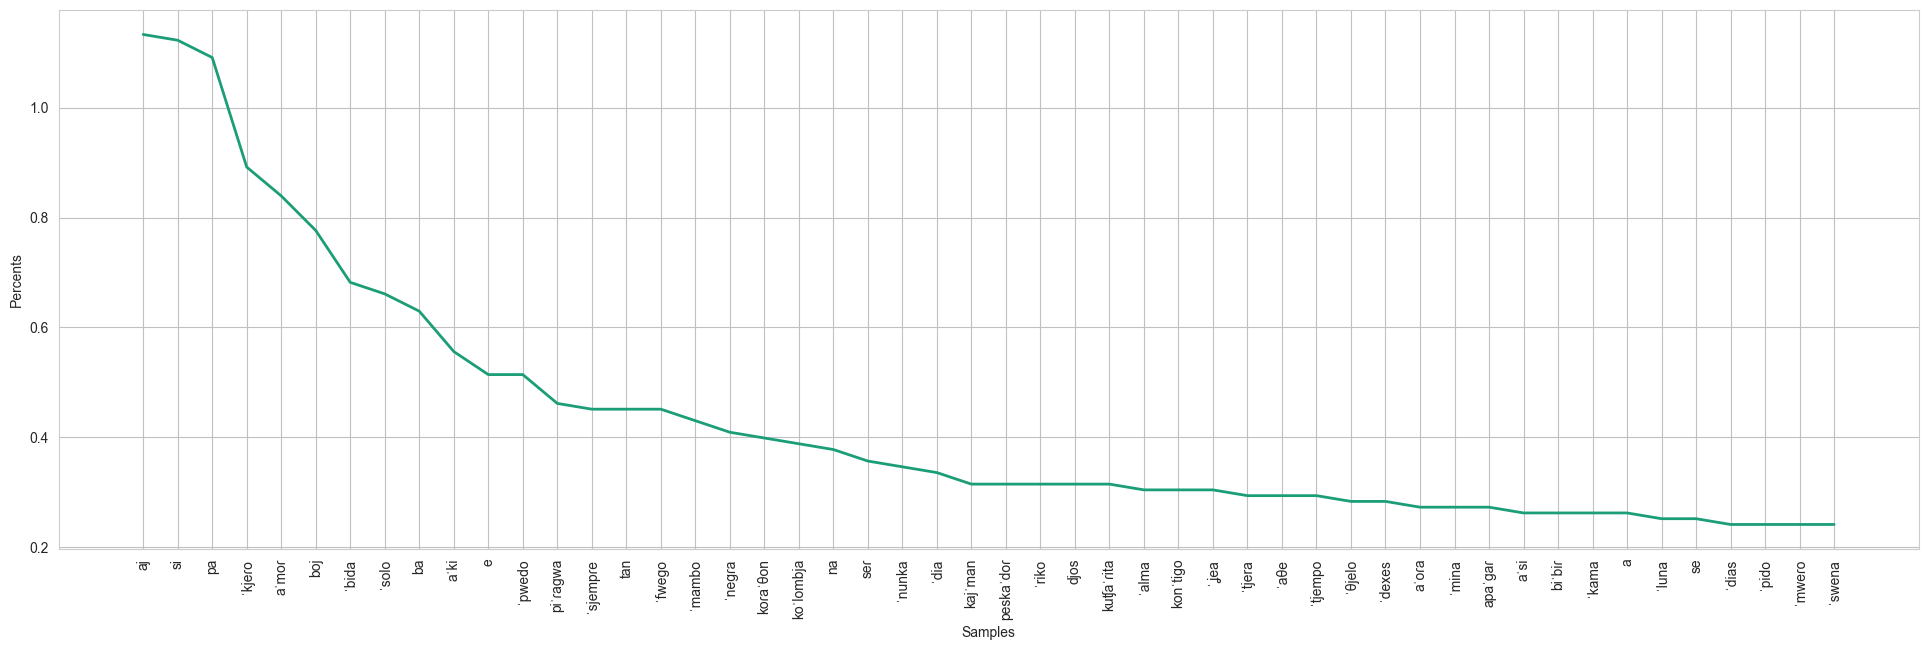

In [26]:
fig = plt.figure(figsize = (24, 7))
fd_words_fonologico = FreqDist(tokens_words_fonologico)
fd_words_fonologico.tabulate(50)
fd_words_fonologico.plot(50, percents=True)

       aj        si        pa    Ààkje…æo     aÀàmo…æ       boj     Ààbi√∞a     Ààsolo        ba      aÀàki         e    Ààpwe√∞o  piÀà…æa…£wa  Ààsjemp…æe       tan    Ààfwe…£o    Ààmambo    Ààne…£…æa  ko…æaÀàŒ∏on koÀàlombja        na       se…æ    Àànu≈ãka      Ààdia   kajÀàman peskaÀà√∞o…æ     Ààriko      djos ku ßaÀà…æita     Ààalma  konÀàti…£o      Àà ùea    Ààtjera      ÀàaŒ∏e   Ààtjempo    ÀàŒ∏jelo    Ààdexes     aÀào…æa     Ààmina   apaÀà…£a…æ      aÀàsi    biÀàŒ≤i…æ     Ààkama         a     Ààluna        se     Ààdias     Ààpi√∞o    Ààmwe…æo    Ààswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25   

<Axes: xlabel='Samples', ylabel='Percents'>

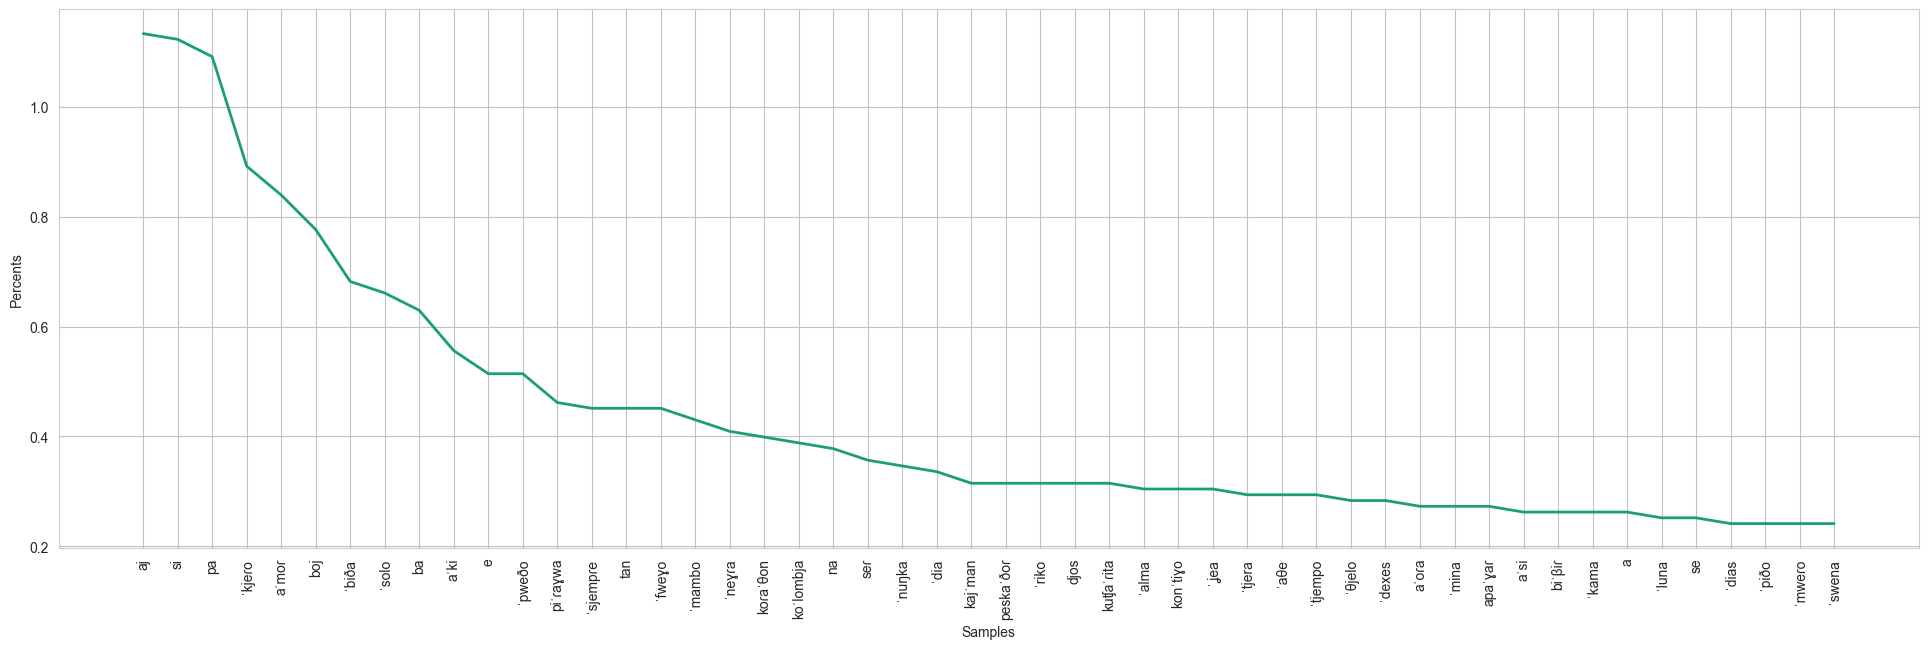

In [27]:
fig = plt.figure(figsize = (24, 7))
fd_words_fonetico = FreqDist(tokens_words_fonetico)
fd_words_fonetico.tabulate(50)
fd_words_fonetico.plot(50, percents=True)

In [28]:
fd_words_fonologico = FreqDist(tokens_words_fonologico)
fd_words_fonetico = FreqDist(tokens_words_fonetico)

fd_words_fonologico.tabulate(50)
fd_words_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_words_fonologico.most_common(top_n)]

values_fono = [fd_words_fonologico[p] for p in labels]
values_fonet = [fd_words_fonetico[p] for p in labels]

       aj        si        pa    Ààkje…æo     aÀàmo…æ       boj     Ààbida     Ààsolo        ba      aÀàki         e    Ààpwedo  piÀà…æagwa  Ààsjemp…æe       tan    Ààfwego    Ààmambo    Ààneg…æa  ko…æaÀàŒ∏on koÀàlombja        na       se…æ    Àànunka      Ààdia   kajÀàman peskaÀàdo…æ     Ààriko      djos ku ßaÀà…æita     Ààalma  konÀàtigo      Àà ùea    Ààtjera      ÀàaŒ∏e   Ààtjempo    ÀàŒ∏jelo    Ààdexes     aÀào…æa     Ààmina   apaÀàga…æ      aÀàsi    biÀàbi…æ     Ààkama         a     Ààluna        se     Ààdias     Ààpido    Ààmwe…æo    Ààswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25    

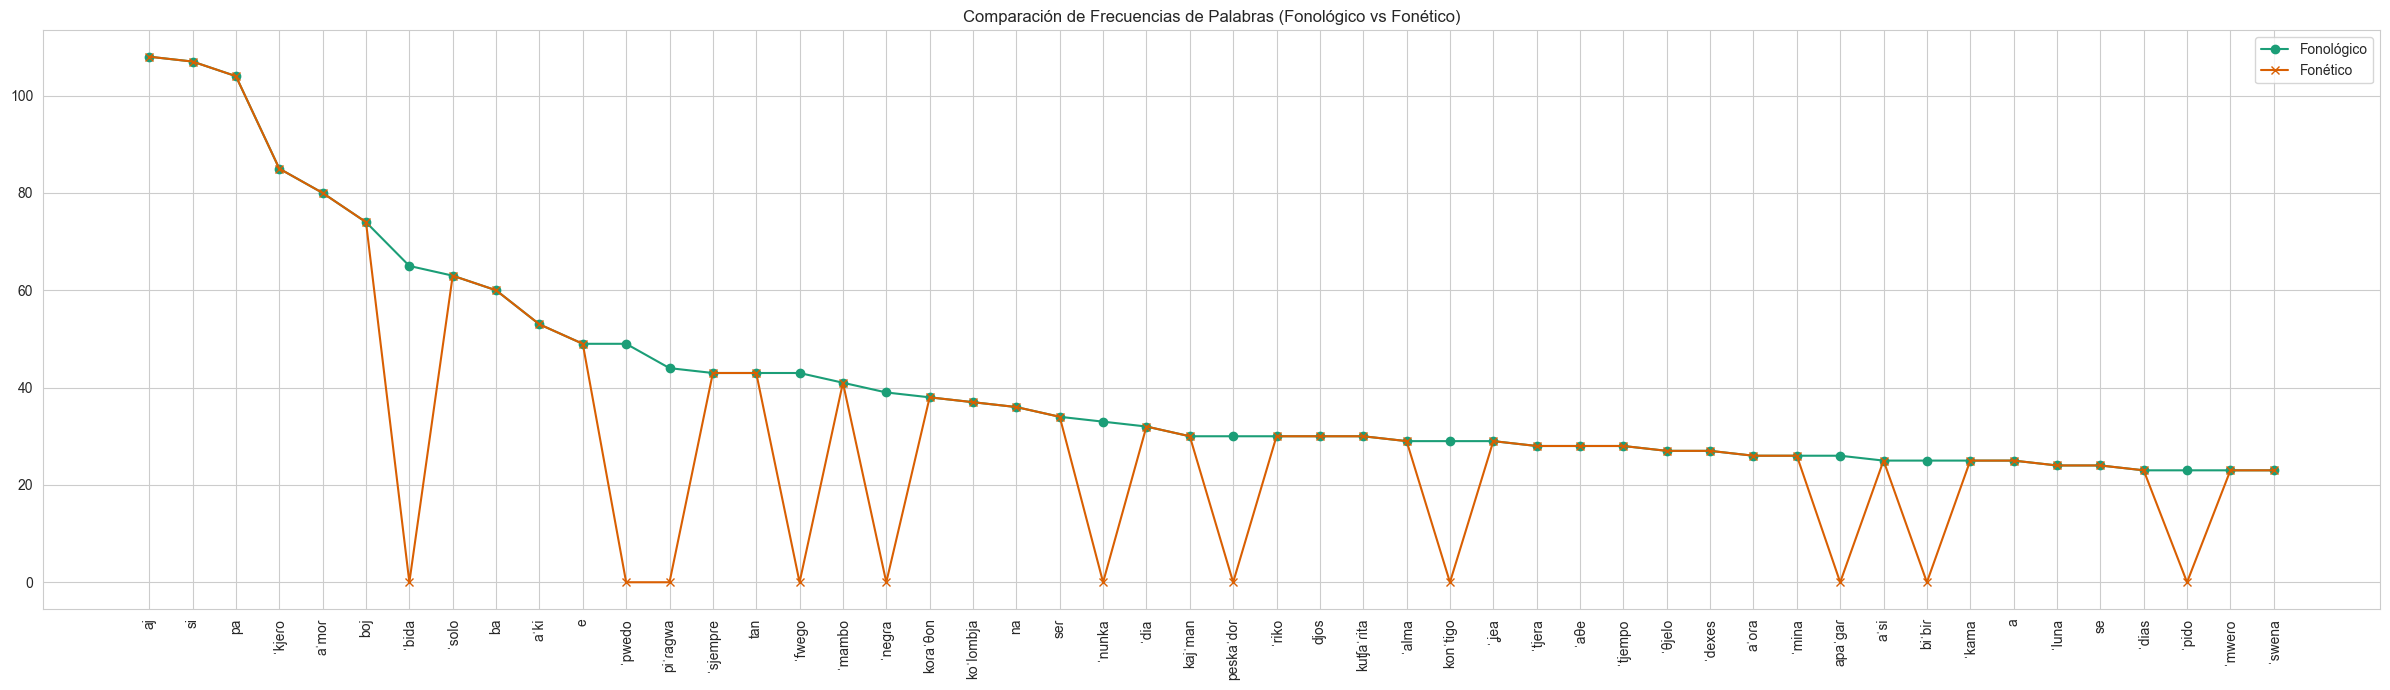

In [29]:
plt.figure(figsize=(24, 7))
plt.plot(labels, values_fono, marker='o', label="Fonol√≥gico")
plt.plot(labels, values_fonet, marker='x', label="Fon√©tico")
plt.title("Comparaci√≥n de Frecuencias de Palabras (Fonol√≥gico vs Fon√©tico)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   a   do   te   ka   ta   …æa   na   ko   ma   to   de   da   ba  Ààdi   …æo  Ààsi   go   me   Ààa  Ààba   lo  Ààpa   sa   pa  Ààmi   bo  Ààbi  Ààka   mo   re  Ààbe   la  Ààma   Œ∏e   be  Ààaj   so Ààkje  Àà…æa   po   Àào   bi   es   no   se  kon   le  Ààki  Ààso  Àà…æi 
 827  514  383  363  309  303  283  283  260  258  223  223  208  202  196  190  178  177  175  174  170  169  168  168  160  157  154  138  134  127  124  122  121  121  119  117  112  112  106  104  102  102  101  100  100  100   96   93   92   90 


<Axes: xlabel='Samples', ylabel='Percents'>

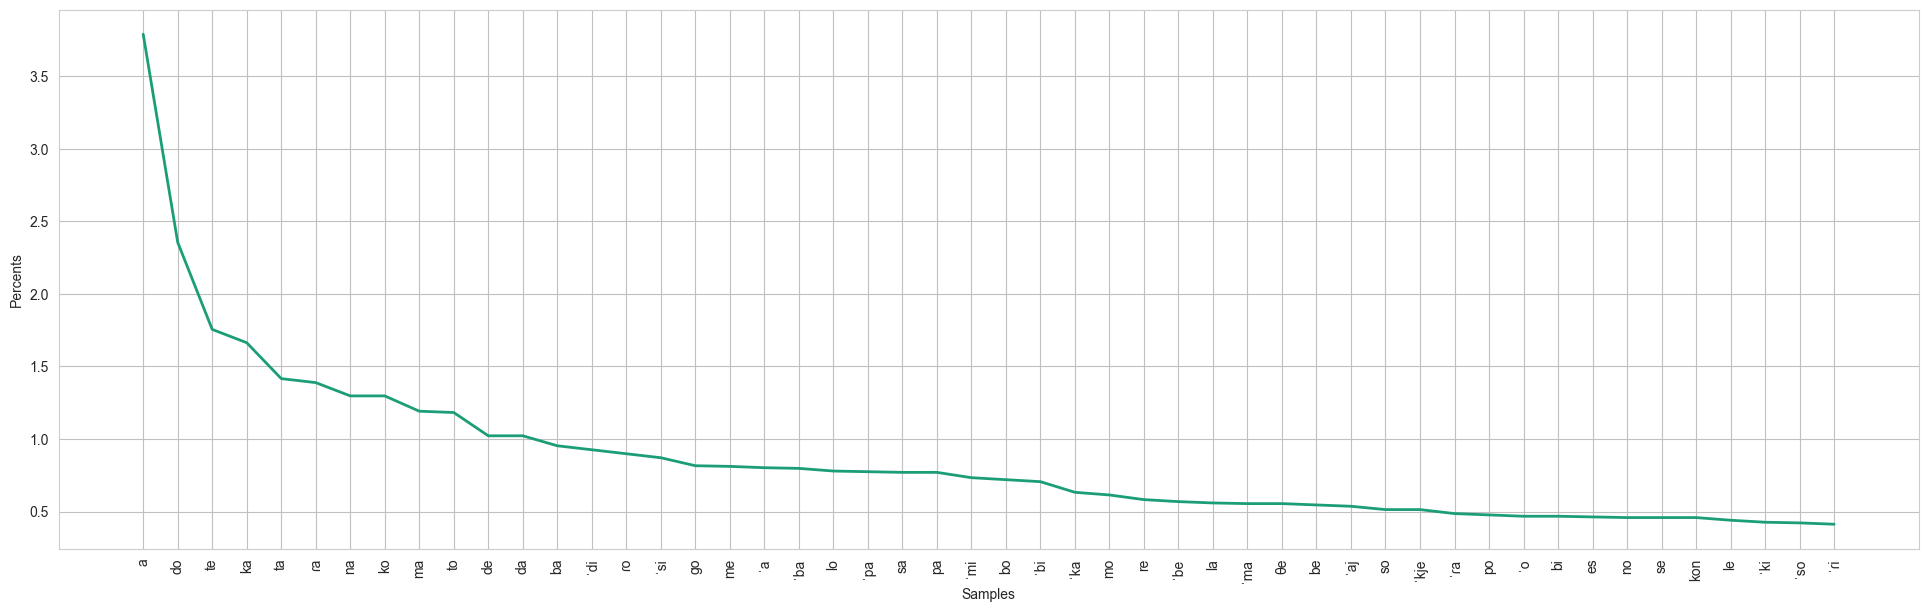

In [30]:
fig = plt.figure(figsize = (24, 7))
fd_silabas_fonologico = FreqDist(tokens_silabas_fonologico)
fd_silabas_fonologico.tabulate(50)
fd_silabas_fonologico.plot(50, percents=True)

   a   te   ka   ta   …æa   na   ko   √∞o   ma   to   do   …æo   √∞a  Ààsi   me   Ààa  Ààdi   de   lo  Ààpa   sa   pa  Ààmi   Œ≤a  Ààka  Ààba   mo   …£o   re   la  Ààma   Œ∏e  Ààaj   so Ààkje  Àà…æa   po  Ààbi   bo   Àào   no   se   es   le  Ààki  Ààso  Àà…æi  Ààbe Ààpwe   ke 
 827  383  363  309  303  283  283  263  260  258  251  196  192  190  177  175  175  174  170  169  168  168  160  139  138  134  134  130  127  122  121  121  117  112  112  106  104  104  102  102  100  100   99   96   93   92   90   90   89   85 


<Axes: xlabel='Samples', ylabel='Percents'>

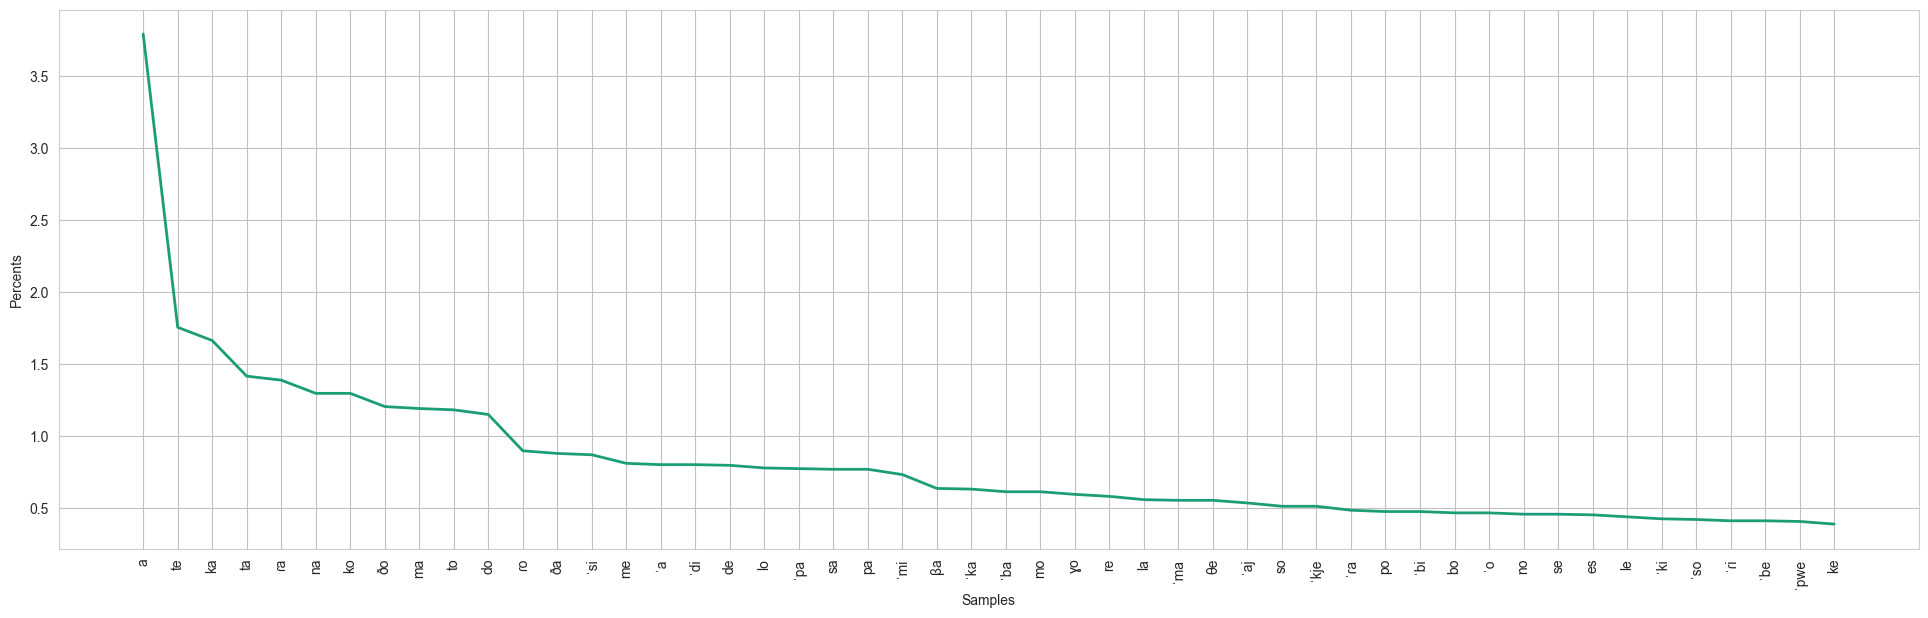

In [31]:
fig = plt.figure(figsize = (24, 7))
fd_silabas_fonetico = FreqDist(tokens_silabas_fonetico)
fd_silabas_fonetico.tabulate(50)
fd_silabas_fonetico.plot(50, percents=True)

In [32]:
fd_silabas_fonologico = FreqDist(tokens_silabas_fonologico)
fd_silabas_fonetico = FreqDist(tokens_silabas_fonetico)

fd_silabas_fonologico.tabulate(50)
fd_silabas_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_silabas_fonologico.most_common(top_n)]

values_fono = [fd_silabas_fonologico[p] for p in labels]
values_fonet = [fd_silabas_fonetico[p] for p in labels]

   a   do   te   ka   ta   …æa   na   ko   ma   to   de   da   ba  Ààdi   …æo  Ààsi   go   me   Ààa  Ààba   lo  Ààpa   sa   pa  Ààmi   bo  Ààbi  Ààka   mo   re  Ààbe   la  Ààma   Œ∏e   be  Ààaj   so Ààkje  Àà…æa   po   Àào   bi   es   no   se  kon   le  Ààki  Ààso  Àà…æi 
 827  514  383  363  309  303  283  283  260  258  223  223  208  202  196  190  178  177  175  174  170  169  168  168  160  157  154  138  134  127  124  122  121  121  119  117  112  112  106  104  102  102  101  100  100  100   96   93   92   90 
   a   te   ka   ta   …æa   na   ko   √∞o   ma   to   do   …æo   √∞a  Ààsi   me   Ààa  Ààdi   de   lo  Ààpa   sa   pa  Ààmi   Œ≤a  Ààka  Ààba   mo   …£o   re   la  Ààma   Œ∏e  Ààaj   so Ààkje  Àà…æa   po  Ààbi   bo   Àào   no   se   es   le  Ààki  Ààso  Àà…æi  Ààbe Ààpwe   ke 
 827  383  363  309  303  283  283  263  260  258  251  196  192  190  177  175  175  174  170  169  168  168  160  139  138  134  134  130  127  122  121  121  117  112  112  106  104  104  102  10

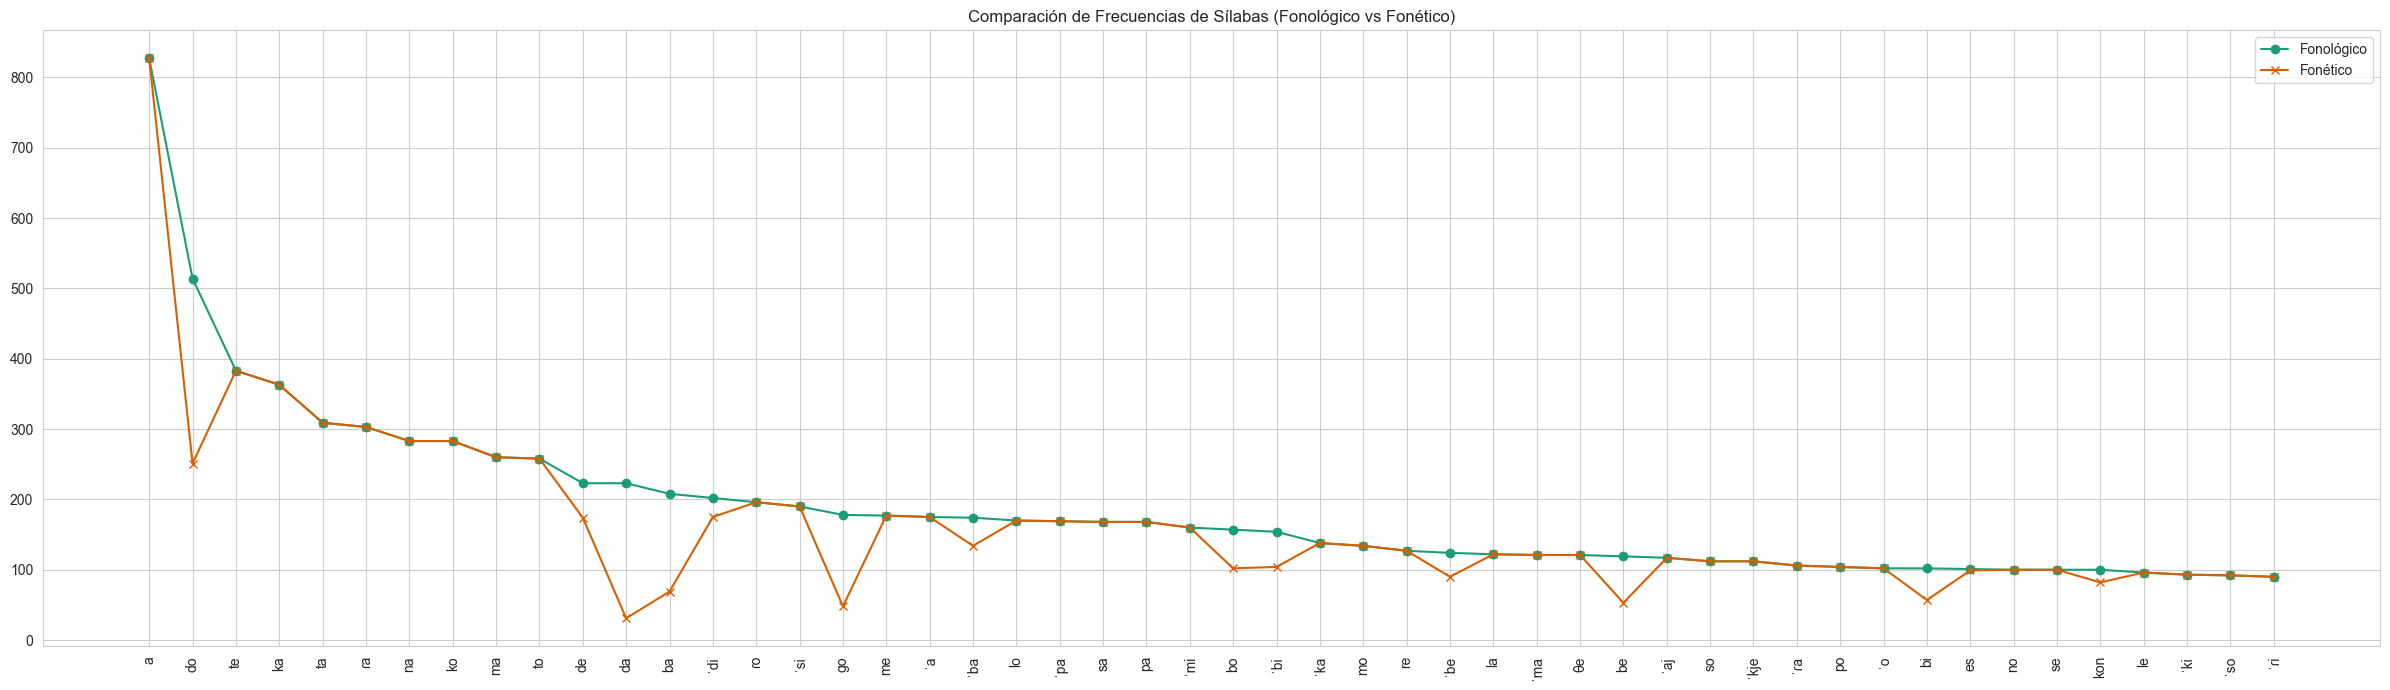

In [33]:
plt.figure(figsize=(24, 7))
plt.plot(labels, values_fono, marker='o', label="Fonol√≥gico")
plt.plot(labels, values_fonet, marker='x', label="Fon√©tico")
plt.title("Comparaci√≥n de Frecuencias de S√≠labas (Fonol√≥gico vs Fon√©tico)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.1. Comparaci√≥n distribuci√≥n fon√©tica vs l√©xica

In [34]:
fd_lexica = FreqDist(words)
fd_words_fonetico = FreqDist(tokens_words_fonetico)

fd_lexica.tabulate(50)
fd_words_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_silabas_fonologico.most_common(top_n)]

p…æiÀàme…æo 
       1 
       aj        si        pa    Ààkje…æo     aÀàmo…æ       boj     Ààbi√∞a     Ààsolo        ba      aÀàki         e    Ààpwe√∞o  piÀà…æa…£wa  Ààsjemp…æe       tan    Ààfwe…£o    Ààmambo    Ààne…£…æa  ko…æaÀàŒ∏on koÀàlombja        na       se…æ    Àànu≈ãka      Ààdia   kajÀàman peskaÀà√∞o…æ     Ààriko      djos ku ßaÀà…æita     Ààalma  konÀàti…£o      Àà ùea    Ààtjera      ÀàaŒ∏e   Ààtjempo    ÀàŒ∏jelo    Ààdexes     aÀào…æa     Ààmina   apaÀà…£a…æ      aÀàsi    biÀàŒ≤i…æ     Ààkama         a     Ààluna        se     Ààdias     Ààpi√∞o    Ààmwe…æo    Ààswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25

In [35]:
df_words_unique = pd.DataFrame(set(words), columns=["Palabra"])

In [36]:
df_words_unique["Fonologia"] = df_words_unique["Palabra"].apply(lambda w:Transcription(w).phonology.words[0])

In [37]:
df_words_unique.head()

Palabra  Fonologia
0  p…æiÀàme…æo  p…æiÀàÀàme…æo

In [38]:
df_grouped = df_words_unique.groupby("Fonologia").agg(
    Palabras_asociadas=("Palabra", lambda x: list(set(x))),
    Num_palabras=("Palabra", "nunique")
).reset_index()

df_multiples = df_grouped[df_grouped["Num_palabras"] > 1].sort_values(by="Num_palabras", ascending=False)
len(df_multiples)

0

In [39]:
df_multiples

Empty DataFrame
Columns: [Fonologia, Palabras_asociadas, Num_palabras]
Index: []

# 5. An√°lisis textom√©trico

In [50]:
letra_concat = concatenate_column(data_lyrics, 'letra')
print(letra_concat[:500])

Voy a empezar mi relato con alegr√≠a y con af√°n
Con alegr√≠a y con af√°n voy a empezar mi relato
En la poblaci√≥n de Plato, se volvi√≥ un hombre caim√°n
Que en la poblaci√≥n de Plato, se volvi√≥ un hombre caim√°n
(Se va el caim√°n, se va el caim√°n)
El caim√°n (se va para Barranquilla)
(Se va el caim√°n, se va el caim√°n)
El caim√°n (se va para Barranquilla)
Lo que come ese caim√°n es digno de admiraci√≥n
Lo que come ese caim√°n es digno de admiraci√≥n
Come queso y come pan, y toma trago de ron
Come queso y come p


In [53]:
textstat.flesch_reading_ease(letra_concat[:500])

-4.518529411764675

In [ ]:
textstat.flesch_reading_ease(text)

<Text: Voy a empezar mi relato con alegr√≠a y...>